In [1]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import pickle
import pandas as pd
import os
import numpy as np
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
)

Unseen dataset

Classifying unseen data with phase1 features
Classifier classes: ['affiliate' 'others']
Unique labels in y_true: {'affiliate', 'others'}
accuracy:  0.9072164948453608
precision:  0.9595375722543352
recall:  0.7793427230046949


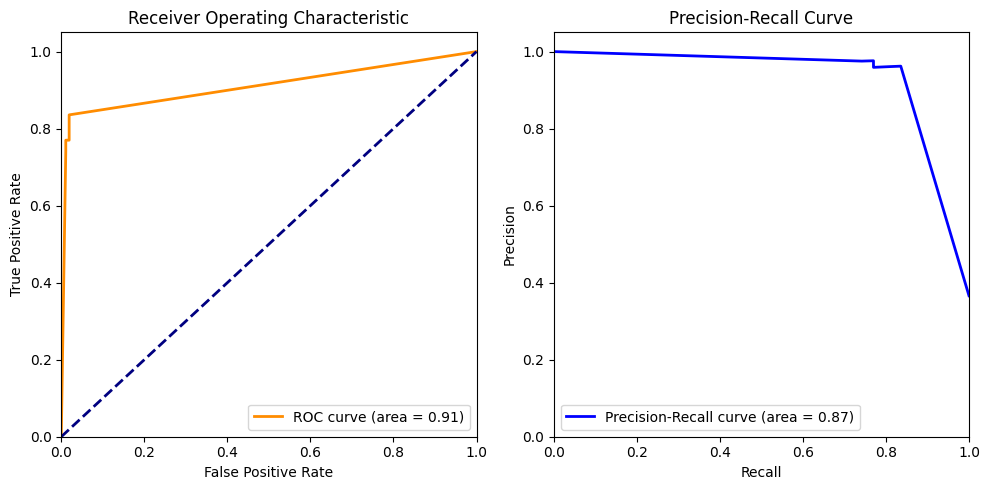

Best threshold for target precision: 0.33
Maximum recall at this threshold: 0.8356807511737089
Accuracy at this threshold: 0.9278350515463918


In [4]:

features_types = ["phase1"]
num_trials = 5  # change this
for iteration in range(num_trials):

    for feature_type in features_types:

        if iteration != 3: 
            continue

        model_name = f'/home/data/chensun/affi_project/purl/output/results/04_24_yt_threshold=0.3_undersampling_5fold_CV_reducedF/{feature_type}/{iteration}/best_model.sav'

        print(f"Classifying unseen data with phase1 features")
        unseen_data_path = f"/home/data/chensun/affi_project/purl/output/results/04_24_yt_threshold=0.3_undersampling_5fold_CV_reducedF/{feature_type}/unseen_{iteration}.csv" 
        unseen_df = pd.read_csv(unseen_data_path)

        #unseen_df.drop(columns=['name_x'], inplace=True)
        #unseen_df.rename(columns={"name_y": "name"}, inplace=True)

        fields_to_remove = ["visit_id", "name", "landing_page_domain", "label", "top_level_url", "Unnamed: 0", 'Unnamed: 0.1', "Unnamed: 0_x" ,"Unnamed: 0_y"]

        unseen_df_features = unseen_df.drop(fields_to_remove, axis=1, errors="ignore")
        #df_features.to_csv("/home/data/chensun/affi_project/purl/output/affiliate/fullGraph/test_2.csv")

        columns = unseen_df_features.columns

        unseen_df_features = unseen_df_features.to_numpy()

        # load the pickled model
        clf = pickle.load(open(model_name, "rb"))

        # predict the labels
        y_pred = clf.predict(unseen_df_features)
        y_true = unseen_df["label"].tolist()
        print("Classifier classes:", clf.classes_)  # ['affiliate' 'others']
        print("Unique labels in y_true:", set(y_true))


        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, average='binary', pos_label='affiliate')  # adjust 'affiliate' if needed
        recall = recall_score(y_true, y_pred, average='binary', pos_label='affiliate')  # adjust 'affiliate' if needed
        print("accuracy: ", accuracy)
        print("precision: ", precision)
        print("recall: ", recall)

        # predict probabilities
        y_pred_proba = clf.predict_proba(unseen_df_features)


        # ROC Curve
        fpr, tpr, roc_thresholds = roc_curve(y_true, y_pred_proba[:, 0], pos_label='affiliate')
        roc_auc = auc(fpr, tpr)

        plt.figure(figsize=(10, 5))

        # Plotting ROC Curve
        plt.subplot(1, 2, 1)
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic')
        plt.legend(loc="lower right")

        # Precision-Recall Curve
        precision, recall, pr_thresholds = precision_recall_curve(y_true, y_pred_proba[:, 0], pos_label='affiliate')
        average_precision = average_precision_score(y_true, y_pred_proba[:, 0], pos_label='affiliate')

        # Plotting Precision-Recall Curve
        plt.subplot(1, 2, 2)
        plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (area = %0.2f)' % average_precision)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('Precision-Recall Curve')
        plt.legend(loc="lower left")

        plt.tight_layout()
        plt.show()


        # Assuming precision, recall, and pr_thresholds are already defined
        # as per your earlier Precision-Recall curve calculation

        # Find threshold that gives the highest recall while maintaining an acceptable level of precision
        target_precision = 0.9  # This is just an example, adjust it to your needs
        max_recall = 0
        best_threshold = 0.5

        for p, r, t in zip(precision, recall, pr_thresholds):
            if p >= target_precision and r > max_recall:
                max_recall = r
                best_threshold = t

        print("Best threshold for target precision:", best_threshold)
        print("Maximum recall at this threshold:", max_recall)
        # Apply the best threshold to get new predictions
        y_pred_custom_boolean = (y_pred_proba[:, 0] >= best_threshold)
       
        y_pred_custom_labels = np.where(y_pred_custom_boolean, 'affiliate', 'others')


        # Calculate the accuracy with the new predictions
        accuracy_at_best_threshold = accuracy_score(y_true, y_pred_custom_labels)

        print("Accuracy at this threshold:", accuracy_at_best_threshold)


Seen dataset 

Classifying seen data with phase1 features
Classifier classes: ['affiliate' 'others']
Unique labels in y_true: {'affiliate', 'others'}


accuracy:  0.993655215103683
precision:  0.9080459770114943
recall:  0.9330708661417323


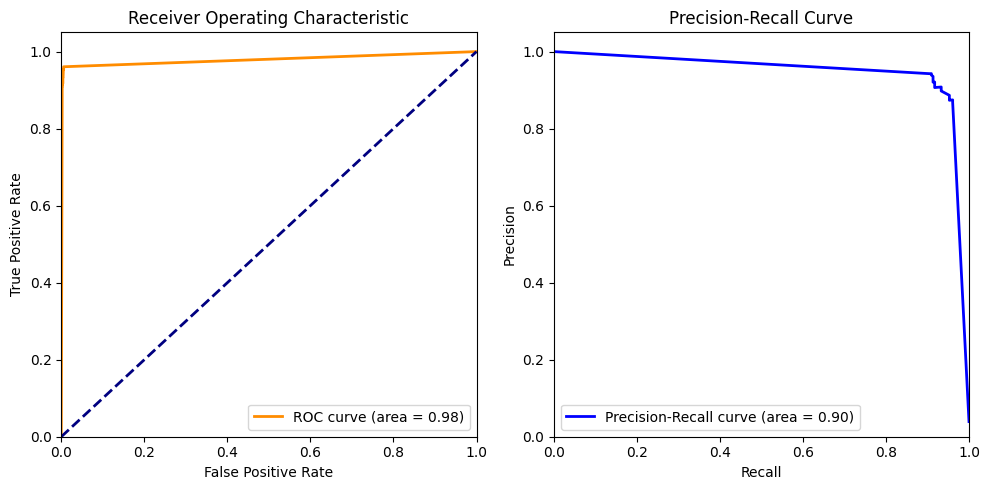

Best threshold for target precision: 0.47
Maximum recall at this threshold: 0.9330708661417323
Accuracy at this threshold: 0.9933457134014237


In [5]:
features_types = ["phase1"]
num_trials = 5  # change this
for iteration in range(num_trials):

    for feature_type in features_types:

        if iteration != 3: 
            continue

        model_name = f'/home/data/chensun/affi_project/purl/output/results/04_24_yt_threshold=0.3_undersampling_5fold_CV_reducedF/{feature_type}/{iteration}/best_model.sav'

        print(f"Classifying seen data with phase1 features")
        seen_data_path = f"/home/data/chensun/affi_project/purl/output/results/04_24_yt_threshold=0.3_undersampling_5fold_CV_reducedF/{feature_type}/{iteration}/result.csv" 
        df_seen = pd.read_csv(seen_data_path)

        fields_to_remove = ["visit_id", "name", "landing_page_domain", "label", "top_level_url", "Unnamed: 0", 'Unnamed: 0.1', "Unnamed: 0_x" ,"Unnamed: 0_y", "clabel", "clabel_prob"]

        df_features = df_seen.drop(fields_to_remove, axis=1, errors="ignore")
        #df_features.to_csv("/home/data/chensun/affi_project/purl/output/affiliate/fullGraph/test_2.csv")

        columns = df_features.columns

        df_features = df_features.to_numpy()

        # load the pickled model
        clf = pickle.load(open(model_name, "rb"))

        # predict the labels
        y_pred = clf.predict(df_features)
        y_true = df_seen["label"].tolist()
        print("Classifier classes:", clf.classes_)  # ['affiliate' 'others']
        print("Unique labels in y_true:", set(y_true))


        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, average='binary', pos_label='affiliate')  # adjust 'affiliate' if needed
        recall = recall_score(y_true, y_pred, average='binary', pos_label='affiliate')  # adjust 'affiliate' if needed
        print("accuracy: ", accuracy)
        print("precision: ", precision)
        print("recall: ", recall)

        # predict probabilities
        y_pred_proba = clf.predict_proba(df_features)


        # ROC Curve
        fpr, tpr, roc_thresholds = roc_curve(y_true, y_pred_proba[:, 0], pos_label='affiliate')
        roc_auc = auc(fpr, tpr)

        plt.figure(figsize=(10, 5))

        # Plotting ROC Curve
        plt.subplot(1, 2, 1)
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic')
        plt.legend(loc="lower right")

        # Precision-Recall Curve
        precision, recall, pr_thresholds = precision_recall_curve(y_true, y_pred_proba[:, 0], pos_label='affiliate')
        average_precision = average_precision_score(y_true, y_pred_proba[:, 0], pos_label='affiliate')

        # Plotting Precision-Recall Curve
        plt.subplot(1, 2, 2)
        plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (area = %0.2f)' % average_precision)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('Precision-Recall Curve')
        plt.legend(loc="lower left")

        plt.tight_layout()
        plt.show()

        # Assuming precision, recall, and pr_thresholds are already defined
        # as per your earlier Precision-Recall curve calculation

        # Find threshold that gives the highest recall while maintaining an acceptable level of precision
        target_precision = 0.9  # This is just an example, adjust it to your needs
        max_recall = 0
        best_threshold = 0.5

        for p, r, t in zip(precision, recall, pr_thresholds):
            if p >= target_precision and r > max_recall:
                max_recall = r
                best_threshold = t

        print("Best threshold for target precision:", best_threshold)
        print("Maximum recall at this threshold:", max_recall)
        # Apply the best threshold to get new predictions
        y_pred_custom_boolean = (y_pred_proba[:, 0] >= best_threshold)
       
        y_pred_custom_labels = np.where(y_pred_custom_boolean, 'affiliate', 'others')


        # Calculate the accuracy with the new predictions
        accuracy_at_best_threshold = accuracy_score(y_true, y_pred_custom_labels)

        print("Accuracy at this threshold:", accuracy_at_best_threshold)
